# Introduction

# Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [3]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir='NEU Metal Surface Defects Data/test'
print("Path: ",os.listdir("NEU Metal Surface Defects Data"))
print("Train: ",os.listdir("NEU Metal Surface Defects Data/train"))
print("Test: ",os.listdir("NEU Metal Surface Defects Data/test"))
print("Validation: ",os.listdir("NEU Metal Surface Defects Data/valid"))

Path:  ['test', 'train', 'valid']
Train:  ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']
Test:  ['crazing', 'inclusion', 'patches', 'pitted', 'rolled', 'scratches']
Validation:  ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


In [4]:
print("Inclusion Defect")
print("Training Images:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Images:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Images:",len(os.listdir(val_dir+'/'+'Inclusion')))

Inclusion Defect
Training Images: 228
Testing Images: 12
Validation Images: 60


In [5]:
# Rescaling all Images by 1./255
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Training images are put in batches of 10
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

# Validation images are put in batches of 10
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1368 images belonging to 6 classes.
Found 360 images belonging to 6 classes.


In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [8]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/20
137/137 [==============================] - 51s 366ms/step - loss: 1.7650 - accuracy: 0.2997 - val_loss: 1.5532 - val_accuracy: 0.2917
Epoch 2/20
137/137 [==============================] - 45s 326ms/step - loss: 1.2028 - accuracy: 0.5607 - val_loss: 1.1302 - val_accuracy: 0.6528
Epoch 3/20
137/137 [==============================] - 44s 317ms/step - loss: 0.9250 - accuracy: 0.7018 - val_loss: 0.8334 - val_accuracy: 0.6444
Epoch 4/20
137/137 [==============================] - 45s 325ms/step - loss: 0.7479 - accuracy: 0.7639 - val_loss: 0.5937 - val_accuracy: 0.8028
Epoch 5/20
137/137 [==============================] - 47s 341ms/step - loss: 0.6506 - accuracy: 0.7982 - val_loss: 0.7861 - val_accuracy: 0.7194
Epoch 6/20
137/137 [==============================] - 51s 372ms/step - loss: 0.5953 - accuracy: 0.8363 - val_loss: 0.9678 - val_accuracy: 0.6361
Epoch 7/20
137/137 [==============================] - 49s 358ms/step - loss: 0.4434 - accuracy: 0.8677 - val_loss: 1.4138 - val_ac

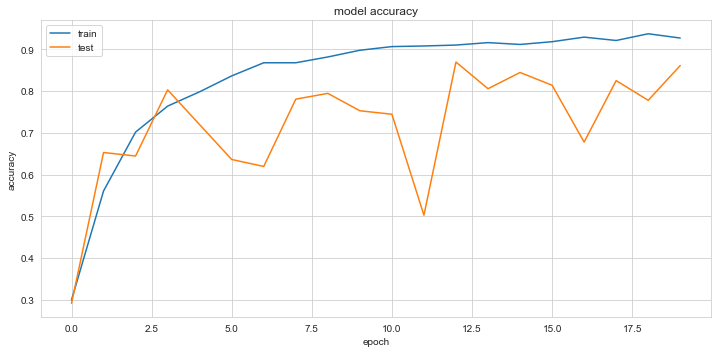

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
plt.show()

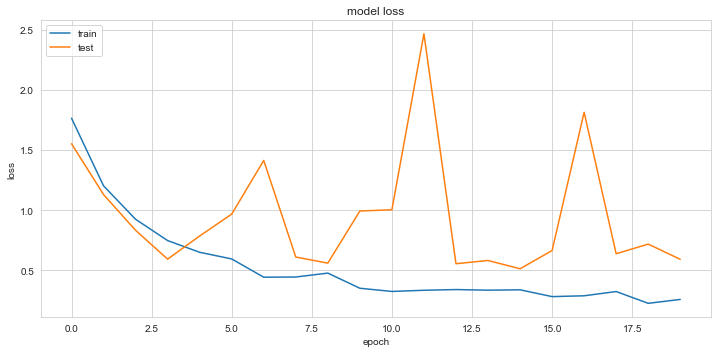

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,12))
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [11]:
# Loading file names & their respective target labels into numpy array
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
x_test, y_test,target_labels = load_dataset(test_dir)
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [12]:
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [13]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [14]:
x_test = x_test.astype('float32')/255

3/3 [==============================] - 0s 81ms/step


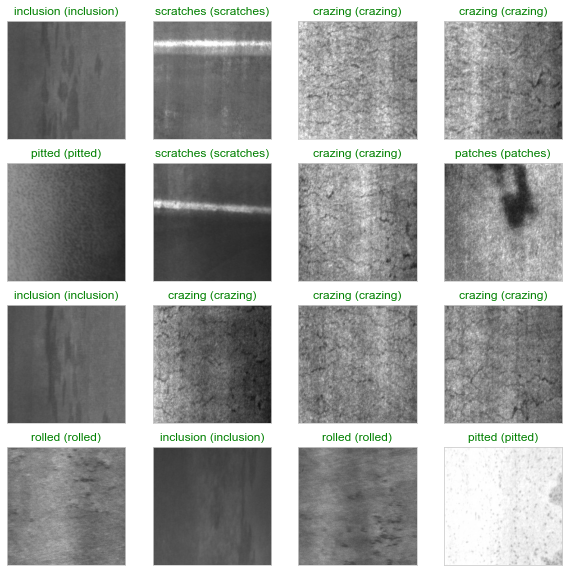

In [15]:
# Plotting Random Sample of test images, their predicted labels, and ground truth
y_pred = model.predict(x_test)
fig = plt.figure(figsize=(10, 10))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))